# MODEL GENERATION OF GBM RANDOM PATHS

In this notebook I show how you can generate random paths according to a GBM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("..")

In [3]:
from financepy.models.gbm_process_simulator import get_paths_times
from financepy.models.gbm_process_simulator import get_assets_paths_times
from financepy.models.gbm_process_simulator import get_assets_paths


### Single Asset Single Path

In [4]:
num_paths = 10
num_time_steps = 1000
t = 1.0
mu = 0.03
S = 100.0
vol = 0.2
seed = 1912

t, x = get_paths_times(num_paths,num_time_steps,t,mu,S,vol,seed)

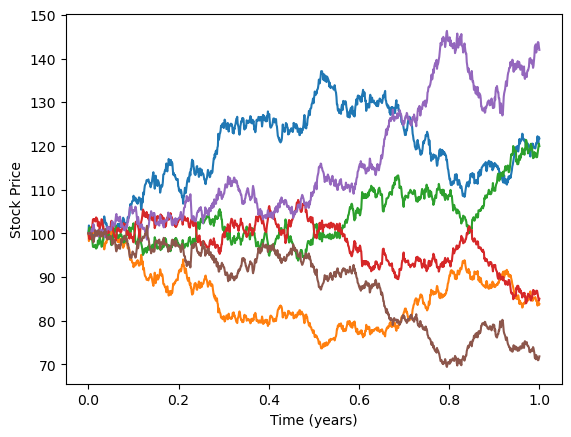

In [5]:
plt.plot(t, x[0])
plt.plot(t, x[1])
plt.plot(t, x[2])
plt.plot(t, x[3])
plt.plot(t, x[4])
plt.plot(t, x[5])
plt.xlabel("Time (years)")
plt.ylabel("Stock Price")
plt.savefig("./figures/black_scholes_wiener_processes_paths_times.png")

# Speed Test

In [6]:
num_paths = 10000
num_time_steps = 10000
t = 1.0
mu = 0.05
S = 100.0
vol = 0.20
seed = 1912

%time [t, x] = get_paths_times(num_paths,num_time_steps,t,mu,S,vol,seed);

CPU times: total: 1.45 s
Wall time: 1.53 s


Average over all paths and steps

In [7]:
dt = t[-1] / num_time_steps;
log_returns = np.diff(np.log(x), 1)
drift = np.mean(log_returns) / dt
volatility = np.std(log_returns) * np.sqrt(1/dt)
print(drift, volatility)

0.02999999999926659 0.19998905257407415


The drift looks a bit low. Will come back to this.

Average over each path to see that we have the right volatility

In [8]:
dt = t[-1] / num_time_steps;
for i in range(0, 10):
    x_path = x[i]
    log_returns = np.diff(np.log(x_path), 1)
    drift = np.mean(log_returns) / dt
    volatility = np.std(log_returns) * np.sqrt(1/dt)
    print(i, drift, volatility)

0 0.012604270445872423 0.19879008513940832
1 0.04739572955266613 0.19879008513940802
2 -0.18543309824455442 0.20191915306189565
3 0.24543309824309387 0.20191915306189573
4 0.0681664600682792 0.19962759685685938
5 -0.008166460069744197 0.19962759685685944
6 0.14795749531135272 0.20132621428131348
7 -0.08795749531282482 0.20132621428131364
8 0.20076056566929523 0.20272259568415377
9 -0.14076056567077 0.20272259568415388


In [9]:
print(volatility)

0.20272259568415388


## Single Asset at Expiry

We can generate time series for a single asset over time.

In [10]:
num_paths = 1000000
num_time_steps = 1
t = 1.0
mu = 0.05
S=100.0
vol = 0.2
seed = 1912

In [11]:
t, x = get_paths_times(num_paths,num_time_steps,t,mu,S,vol,seed)

Time has only today and the final time

In [12]:
t

array([0., 1.])

The distribution at time zero is peaked at 100.0

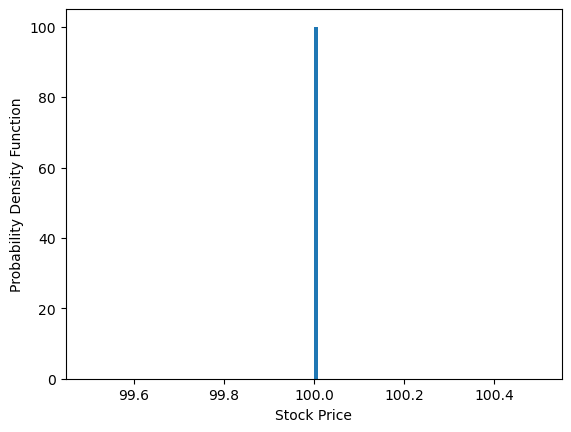

In [13]:
plt.hist(x[:,0], 100, density=True);
plt.xlabel("Stock Price")
plt.ylabel("Probability Density Function");
plt.savefig("./figures/black_scholes_wiener_processes_fig_2.png")


At T = 1 there is a full lognormal distribution

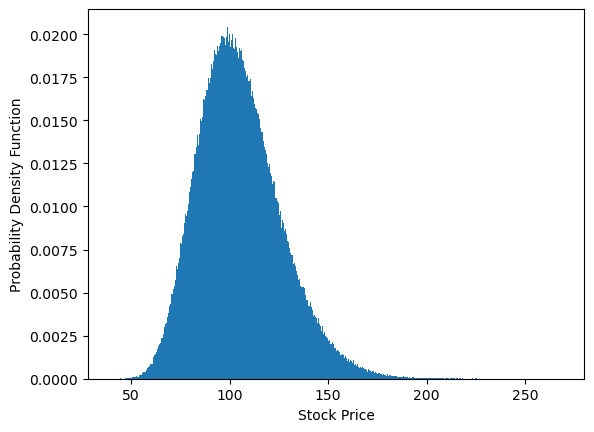

In [14]:
plt.hist(x[:,1], 1000, density=True);
plt.xlabel("Stock Price")
plt.ylabel("Probability Density Function")
plt.savefig("./figures/black_scholes_wiener_processes_fig_3.png")


# Multiple Assets, One Time

In [15]:
num_paths = 10
num_assets = 3
t = 1.0
mus = 0.03 * np.ones(num_assets)
stock_prices = 100.0 * np.ones(num_assets)
volatilities = 0.2 * np.ones(num_assets)
rho = 0.8
corr_matrix = np.array([[1.0, rho, rho],[rho, 1.0, rho], [rho,rho,1.0]])
seed = 1010

In [16]:
t, x = get_assets_paths(num_assets, num_paths, t,
                   mus, stock_prices, volatilities,
                   corr_matrix, seed)

In [17]:
x.shape

(3, 10)

In [18]:
x[0]

array([ 79.84446908, 127.77357678,  70.46079678, 144.78992386,
       123.19917085,  82.80910764,  72.60935696, 140.50549168,
        91.34544603, 111.68606476])

In [19]:
x[1]

array([ 79.92756607, 127.6407365 ,  76.91425825, 132.64138058,
        89.15986821, 114.42382772,  72.66721468, 140.39362104,
        96.45335486, 105.7714728 ])

In [20]:
x[2]

array([ 70.00011377, 145.7428117 ,  90.51736941, 112.70779815,
        99.13245554, 102.91294959,  81.9351985 , 124.51319564,
       126.54392845,  80.62033102])

## Multiple Assets, Paths and Times

In [21]:
num_paths = 10
num_time_steps = 1000
num_assets = 3
t = 1.0
mus = 0.03 * np.ones(num_assets)
stock_prices = 100.0 * np.ones(num_assets)
volatilities = 0.2 * np.ones(num_assets)
rho = 0.9
corr_matrix = np.array([[1.0, rho, rho],[rho, 1.0, rho], [rho,rho,1.0]])
seed = 1010

In [22]:
t, x = get_assets_paths_times(num_assets, num_paths, num_time_steps, t,
                   mus, stock_prices, volatilities,
                   corr_matrix, seed)

In [23]:
x.shape

(3, 10, 1001)

Let us consider the first path of three different assets

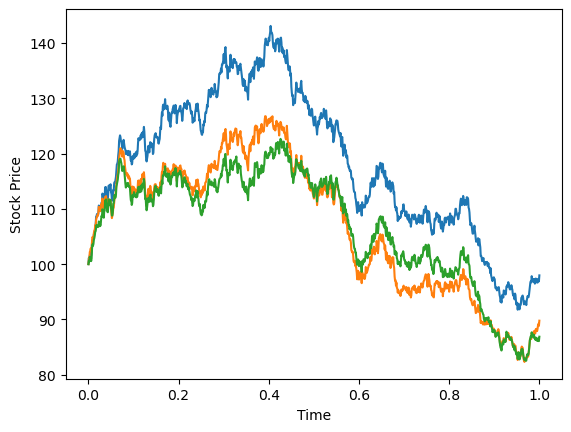

In [24]:
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.plot(t, x[0][1])
plt.plot(t, x[1][1])
plt.plot(t, x[2][1])
plt.savefig("./figures/black_scholes_wiener_processes_correlated_assets.png")


In [25]:
dt = t[-1] / num_time_steps;
x_log_returns_1 = np.diff(np.log(x[1][0]), 1)
x_log_returns_2 = np.diff(np.log(x[2][0]), 1)
volatility_1 = np.std(x_log_returns_1) * np.sqrt(1/dt)
volatility_2 = np.std(x_log_returns_2) * np.sqrt(1/dt)
corr_12 = np.corrcoef(x_log_returns_1, x_log_returns_2)
print(volatility_1)
print(volatility_2)
print(corr_12)

0.20509630676396517
0.20285514811414818
[[1.         0.90623246]
 [0.90623246 1.        ]]


# Antithetics

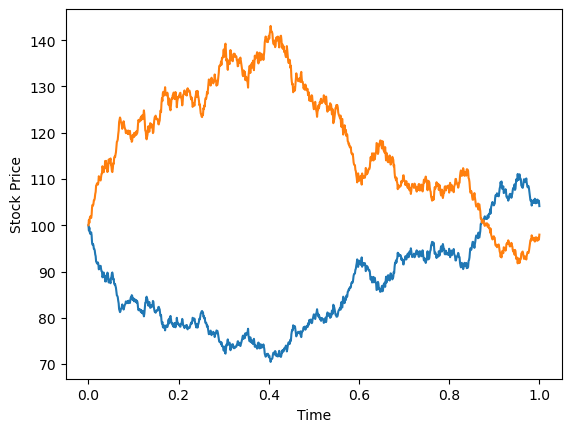

In [26]:
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.plot(t, x[0][0])
plt.plot(t, x[0][1])
plt.savefig("./figures/black_scholes_antithetic_paths.png")


Be careful calculating the correlation

In [27]:
dt = t[-1] / num_time_steps;
x_log_returns_1 = np.diff(np.log(x[1][0]), 1)
x_log_returns_2 = np.diff(np.log(x[1][1]), 1)
volatility_1 = np.std(x_log_returns_1) * np.sqrt(1/dt)
volatility_2 = np.std(x_log_returns_2) * np.sqrt(1/dt)
corr_12 = np.corrcoef(x_log_returns_1, x_log_returns_2)
print(volatility_1)
print(volatility_2)
print(corr_12)

0.20509630676396517
0.20509630676396504
[[ 1. -1.]
 [-1.  1.]]


Copyright (c) 2019, Dominic O'Kane 